# Домашнее задание "Теория оптимизации"

## Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
pass
'''
Описание параметров функции scipy.optimize.differential_evolution нахождения глобального минимума
----------------------------------------------------------------------------------------------------
scipy.optimize.differential_evolution(func,                 # function to be minimized.
                                      bounds,               # Границы для переменных
                                      args=(),              # (необязательно) параметры, необходимые для полного определения целевой функции
                                      strategy='best1bin',  # стратегия дифференциальной эволюции:
                                                                'best1bin'
                                                                'best1exp'
                                                                'rand1exp'
                                                                'randtobest1exp'
                                                                'currenttobest1exp'
                                                                'best2exp'
                                                                'rand2exp'
                                                                'randtobest1bin'
                                                                'currenttobest1bin'
                                                                'best2bin'
                                                                'rand2bin'
                                                                'rand1bin'
                                      maxiter=1000,          # (необязательно) Максимальное количество поколений
                                      popsize=15,            # Множитель для установки общей численности населения popsize * len(x)
                                      tol=0.01,              # (необязательно) Относительный допуск для сходимости
                                      mutation=0.5, 1,       # Константа мутации F в диапазоне [0, 2]
                                      recombination=0.7,     # (необязательно) Константа рекомбинации в диапазоне [0, 1] (вероятность кроссовера CR)
                                      seed=None,             # (необязательно) 
                                      callback=None,         # (необязательно) Функция для отслеживания прогресса минимизации
                                      disp=False,            # (необязательно) Печатает вычисленную функцию на каждой итерации
                                      polish=True,           # (необязательно) 
                                      init='latinhypercube', # (optional) тип инициализации населения:
                                                                          'latinhypercube'
                                                                          'random'
                                                                           array (M, len(x)) определяющий начальную популяцию. 
                                                                           Массив должен иметь форму , где M - общая численность популяции, 
                                                                           len (x) - количество параметров
                                      atol=0,                # (необязательно) Абсолютный допуск для сходимости
                                      updating='immediate',  # (необязательно) 'immediate', вектор наилучшего решения постоянно обновляется в пределах одного поколения
                                                                               'deferred'вектор наилучшего решения обновляется один раз за поколение
                                      workers=1, 
                                      constraints=())
'''


"\nОписание параметров функции scipy.optimize.differential_evolution нахождения глобального минимума\n----------------------------------------------------------------------------------------------------\nscipy.optimize.differential_evolution(func,                 # function to be minimized.\n                                      bounds,               # Границы для переменных\n                                      args=(),              # (необязательно) параметры, необходимые для полного определения целевой функции\n                                      strategy='best1bin',  # стратегия дифференциальной эволюции:\n                                                                'best1bin'\n                                                                'best1exp'\n                                                                'rand1exp'\n                                                                'randtobest1exp'\n                                                                'curr

In [3]:
# Пример использования функции scipy.optimize.differential_evolution
def ackley (x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e


bounds = [( -5 , 5 ), ( -5 , 5 )]
result = differential_evolution(ackley, bounds, seed =42)
result


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2973
     nit: 96
 success: True
       x: array([0., 0.])

In [4]:
result.x, result.fun

(array([0., 0.]), 4.440892098500626e-16)

In [5]:
# параметры функции
strategies = ['best1bin',
            'best1exp',
            'rand1exp',
            'randtobest1exp',
            'currenttobest1exp',
            'best2exp',
            'rand2exp',
            'randtobest1bin',
            'currenttobest1bin',
            'best2bin',
            'rand2bin',
            'rand1bin']
maxiter=1000
popsize=15
mutation=0.5, 1
recombination=0.7
polish=True

M = 1000
x = bounds
init=['latinhypercube',
      'random',
       np.array([M, len(x)])] # array (M, len(x)) определяющий начальную популяцию. 
                             # Массив должен иметь форму , где M - общая численность популяции, 
                             # len (x) - количество параметров
updating = ['immediate', 'deferred']



# Зависимость результата от параметров differential_evolution

## 1. Зависимость параметров результата от strategy

In [6]:
# Зависимость параметров результата от strategy

strategies = ['best1bin',
            'best1exp',
            'rand1exp',
            'randtobest1exp',
            'currenttobest1exp',
            'best2exp',
            'rand2exp',
            'randtobest1bin',
            'currenttobest1bin',
            'best2bin',
            'rand2bin',
            'rand1bin']

fun = []
message = []
nfev = []
nit = []
success = []
x = []

from scipy.optimize import differential_evolution
for strategy in strategies:
    result = differential_evolution(ackley, bounds, seed =42, strategy=strategy)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)


Text(0.5, 1.0, 'Зависимость x от strategy')

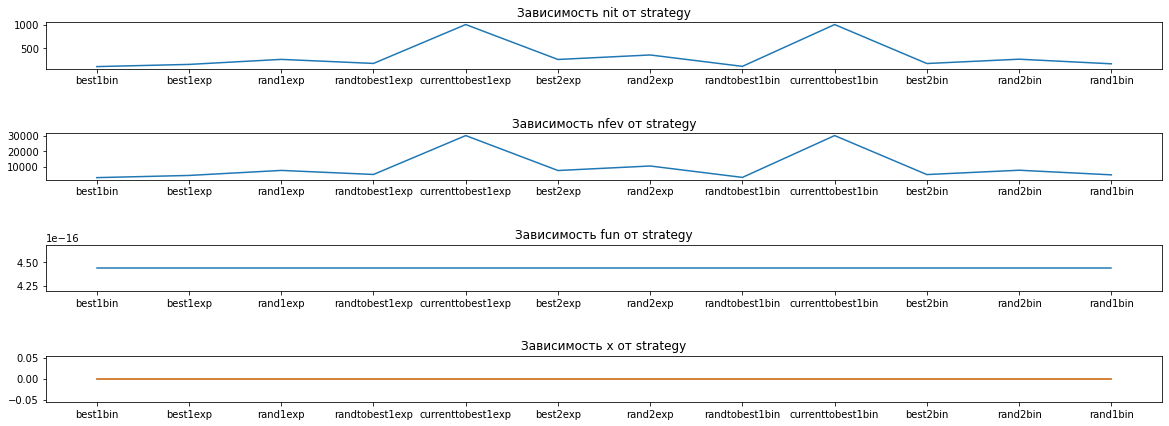

In [7]:
# Визуализация зависимости параметров результата от strategy

plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(strategies, nit)
plt.title('Зависимость nit от strategy')

plt.subplot (8, 1, 3)
plt.plot(strategies, nfev)
plt.title('Зависимость nfev от strategy')

plt.subplot (8, 1, 5)
plt.plot(strategies, fun)
plt.title('Зависимость fun от strategy')

plt.subplot (8, 1, 7)
plt.plot(strategies, x)
plt.title('Зависимость x от strategy')


#### Вывод: Минимальное количество итераций у метода по умолчанию 'best1bin'

## 2. Зависимость параметров результата от maxiter

In [8]:
# Зависимость параметров результата от maxiter (1000, 10000)

# Очень много времени на расчет

fun = []
message = []
nfev = []
nit = []
success = []
x = []

for maxiter in range(1000, 10000, 1000):
    result = differential_evolution(ackley, bounds, seed =42, strategy='currenttobest1exp', maxiter=maxiter)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)

Text(0.5, 1.0, 'Зависимость x от maxiter')

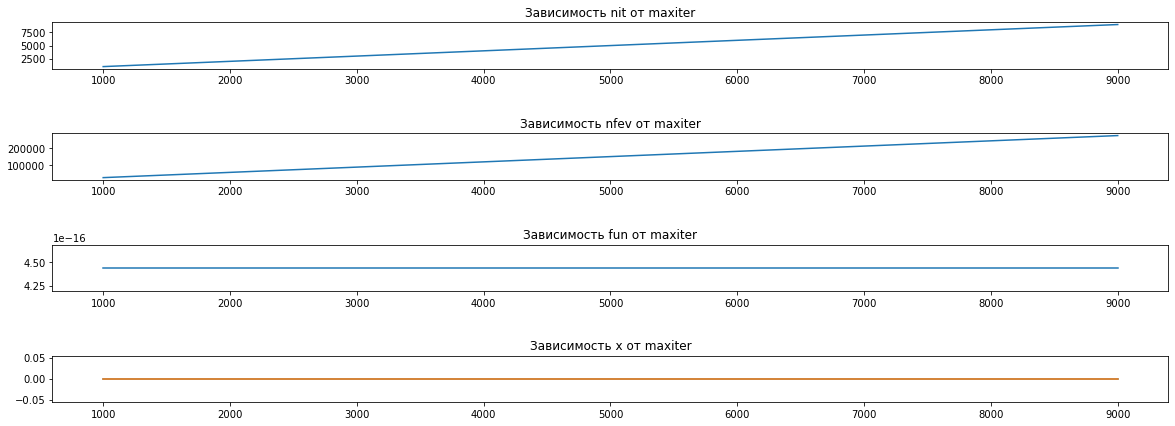

In [9]:
# Визуализация зависимости параметров результата от maxiter

maxiter = list(range(1000, 10000, 1000))

plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(maxiter, nit)
plt.title('Зависимость nit от maxiter')

plt.subplot (8, 1, 3)
plt.plot(maxiter, nfev)
plt.title('Зависимость nfev от maxiter')

plt.subplot (8, 1, 5)
plt.plot(maxiter, fun)
plt.title('Зависимость fun от maxiter')

plt.subplot (8, 1, 7)
plt.plot(maxiter, x)
plt.title('Зависимость x от maxiter')


In [10]:
success

[False, False, False, False, False, False, False, False, False]

#### Вывод: Увеличение maxiter более 1000 не оказывает влияния на результат, кроме увеличения времени расчета. На сходимость результата стратегии 'currenttobest1exp' не повлияло.

## 3. Зависимость параметров результата от popsize

In [11]:
# Зависимость параметров результата от popsize (5, 45)

fun = []
message = []
nfev = []
nit = []
success = []
x = []

for popsize in range(5, 45, 5):
    result = differential_evolution(ackley, bounds, seed =42, strategy='best1bin', maxiter=1000, popsize=popsize)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)


Text(0.5, 1.0, 'Зависимость x от popsize')

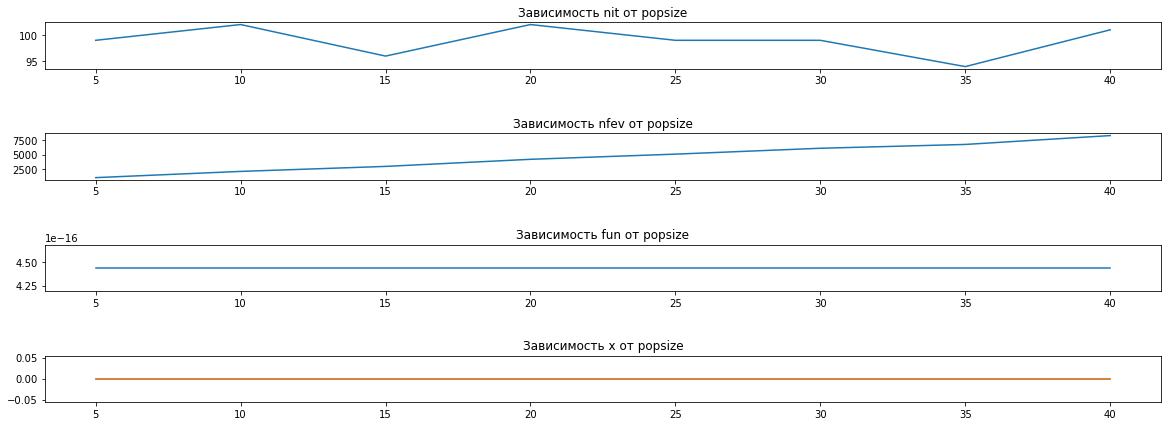

In [12]:
# Визуализация зависимости параметров результата от popsize

popsize = list(range(5, 45, 5))

plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(popsize, nit)
plt.title('Зависимость nit от popsize')

plt.subplot (8, 1, 3)
plt.plot(popsize, nfev)
plt.title('Зависимость nfev от popsize')

plt.subplot (8, 1, 5)
plt.plot(popsize, fun)
plt.title('Зависимость fun от popsize')

plt.subplot (8, 1, 7)
plt.plot(popsize, x)
plt.title('Зависимость x от popsize')

#### Вывод: Изменение popsize = 15 в меньшую и большую сторону приводит к увеличению количества итераций при том же результате.

## 4. Зависимость параметров результата от mutation

In [25]:
# Зависимость параметров результата от mutation (0, 2)

fun = []
message = []
nfev = []
nit = []
success = []
x = []

mutations = np.linspace(0,1.9,20)

for mutation in mutations:
    result = differential_evolution(ackley, bounds, seed =42,
                                    strategy='best1bin', maxiter=1000,
                                    popsize=15, mutation=mutation)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)


Text(0.5, 1.0, 'Зависимость x от mutation')

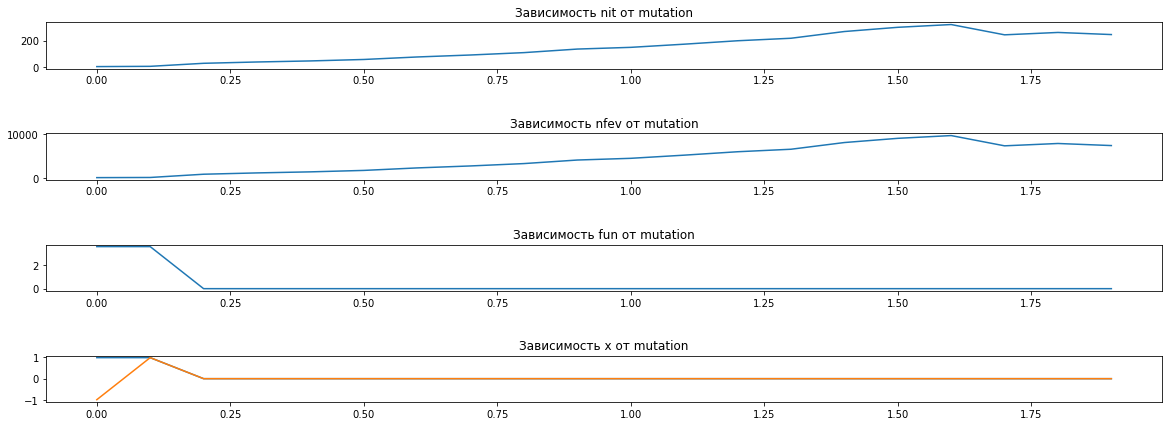

In [27]:
# Визуализация зависимости параметров результата от mutation



plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(mutations, nit)
plt.title('Зависимость nit от mutation')

plt.subplot (8, 1, 3)
plt.plot(mutations, nfev)
plt.title('Зависимость nfev от mutation')

plt.subplot (8, 1, 5)
plt.plot(mutations, fun)
plt.title('Зависимость fun от mutation')

plt.subplot (8, 1, 7)
plt.plot(mutations, x)
plt.title('Зависимость x от mutation')

In [15]:
fun

[1.2988362829702282e-08,
 3.9968028886505635e-15,
 7.549516567451064e-15,
 4.440892098500626e-16,
 4.440892098500626e-16,
 3.9968028886505635e-15,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 1.9537055084839494e-08,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 3.9968028886505635e-15,
 4.440892098500626e-16,
 1.442651909044912e-08,
 2.871036741680655e-12,
 3.9968028886505635e-15]

In [16]:
mutations

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

#### Вывод: Изменение mutation менее 0.25 и более 1.5 приводит к искажению результата, увеличение более 0.25 повышает количество итераций. 

## 5. Зависимость параметров результата от recombination

In [17]:
# Зависимость параметров результата от recombination (0, 1)

fun = []
message = []
nfev = []
nit = []
success = []
x = []

recombinations = np.linspace(0,1,20)

for recombination in recombinations:
    result = differential_evolution(ackley, bounds, seed =42,
                                    strategy='best1bin', maxiter=1000,
                                    popsize=15, mutation=0.5,
                                   recombination=recombination)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)

Text(0.5, 1.0, 'Зависимость x от recombination')

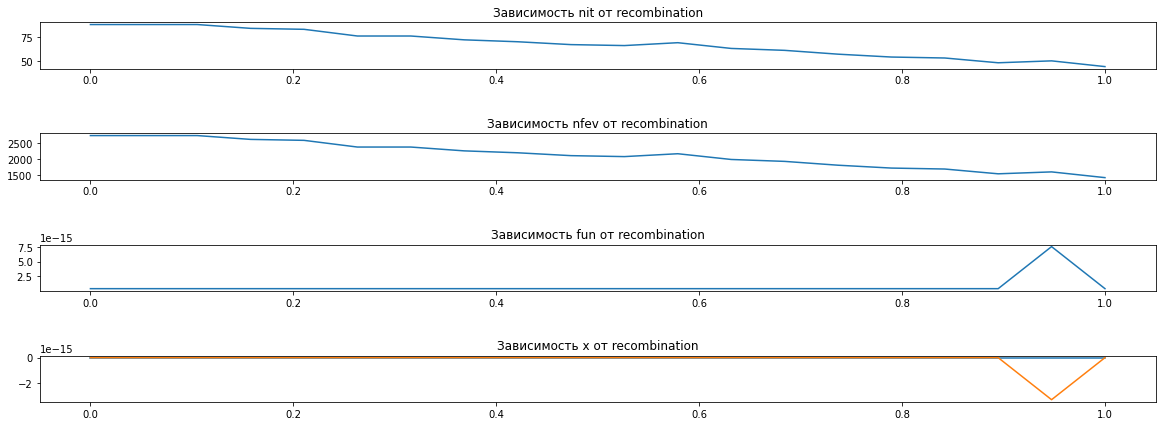

In [18]:
# Визуализация зависимости параметров результата от recombination



plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(recombinations, nit)
plt.title('Зависимость nit от recombination')

plt.subplot (8, 1, 3)
plt.plot(recombinations, nfev)
plt.title('Зависимость nfev от recombination')

plt.subplot (8, 1, 5)
plt.plot(recombinations, fun)
plt.title('Зависимость fun от recombination')

plt.subplot (8, 1, 7)
plt.plot(recombinations, x)
plt.title('Зависимость x от recombination')

#### Вывод: Увеличение recombination до 1 приводит к снижению количества итераций при том же результате fun и x.

## 6. Зависимость параметров результата от init

In [19]:
# Зависимость параметров результата от init

fun = []
message = []
nfev = []
nit = []
success = []
x = []

inits = ['latinhypercube',
      'random']

for init in inits:
    result = differential_evolution(ackley, bounds, seed =42,
                                    strategy='best1bin', maxiter=1000,
                                    popsize=15, mutation=0.5,
                                   recombination=0.7, init=init)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)

Text(0.5, 1.0, 'Зависимость x от init')

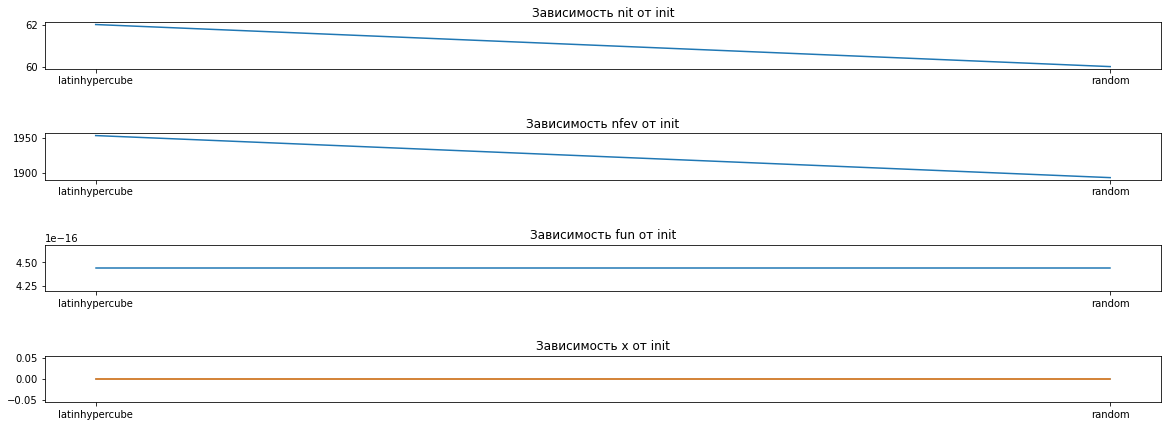

In [20]:
# Визуализация зависимости параметров результата от init



plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(inits, nit)
plt.title('Зависимость nit от init')

plt.subplot (8, 1, 3)
plt.plot(inits, nfev)
plt.title('Зависимость nfev от init')

plt.subplot (8, 1, 5)
plt.plot(inits, fun)
plt.title('Зависимость fun от init')

plt.subplot (8, 1, 7)
plt.plot(inits, x)
plt.title('Зависимость x от init')

#### Вывод: Изменение значения по умолчанию init='latinhypercube' на 'random' увеличивает количество итераций при том же результате.

## 7. Зависимость параметров результата от updating

In [21]:
# Зависимость параметров результата от updating

fun = []
message = []
nfev = []
nit = []
success = []
x = []

updatings = ['immediate', 'deferred']

for updating in updatings:
    result = differential_evolution(ackley, bounds, seed =42,
                                    strategy='best1bin', maxiter=1000,
                                    popsize=15, mutation=0.5,
                                    recombination=0.7, init='latinhypercube',
                                    updating=updating)
    fun.append(result.fun)
    message.append(result.message)
    nfev.append(result.nfev)
    nit.append(result.nit)
    success.append(result.success)
    x.append(result.x)


Text(0.5, 1.0, 'Зависимость x от updating')

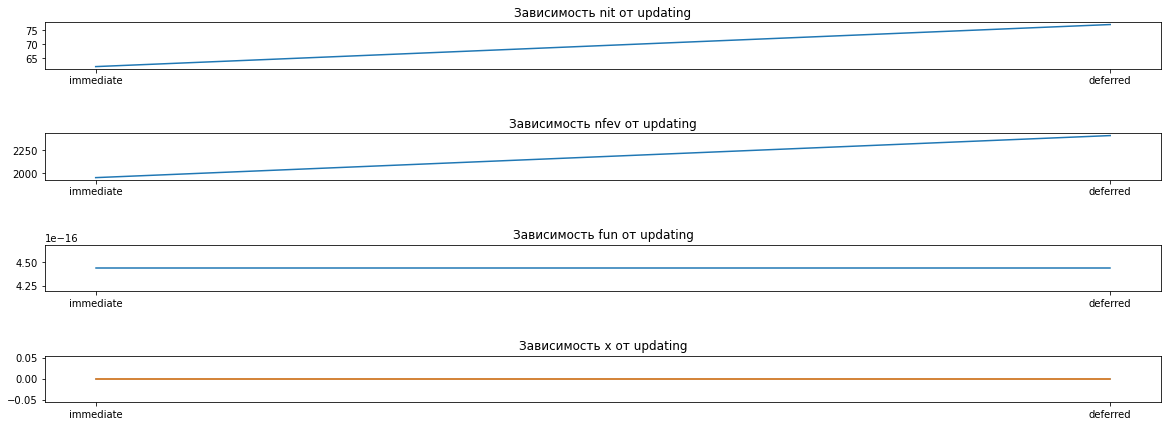

In [22]:
# Визуализация зависимости параметров результата от updating



plt.figure(figsize=(20, 8))

plt.subplot (8, 1, 1)
plt.plot(updatings, nit)
plt.title('Зависимость nit от updating')

plt.subplot (8, 1, 3)
plt.plot(updatings, nfev)
plt.title('Зависимость nfev от updating')

plt.subplot (8, 1, 5)
plt.plot(updatings, fun)
plt.title('Зависимость fun от updating')

plt.subplot (8, 1, 7)
plt.plot(updatings, x)
plt.title('Зависимость x от updating')

#### Вывод: Изменение значения по умолчанию updating='immediate' на 'deferred' увеличивает количество итераций при том же результате. В виду наличия случайной составляющей в функции differential_evolution параметры результата вычисления могут изменяться.

### Резюме: Использование параметров differential_evolution по умолчанию - оптимально.